<a href="https://colab.research.google.com/github/jrapun/TFG_OptimizacionBayesiana/blob/main/Copia_de_TFG_matematicas_Javier_Esplugues_BUENO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib . pyplot as plt
import random
import math
import pandas as pd
import scipy.stats as stat
import scipy.optimize as opt

### Gráficos e imágenes



GRÁFICOS

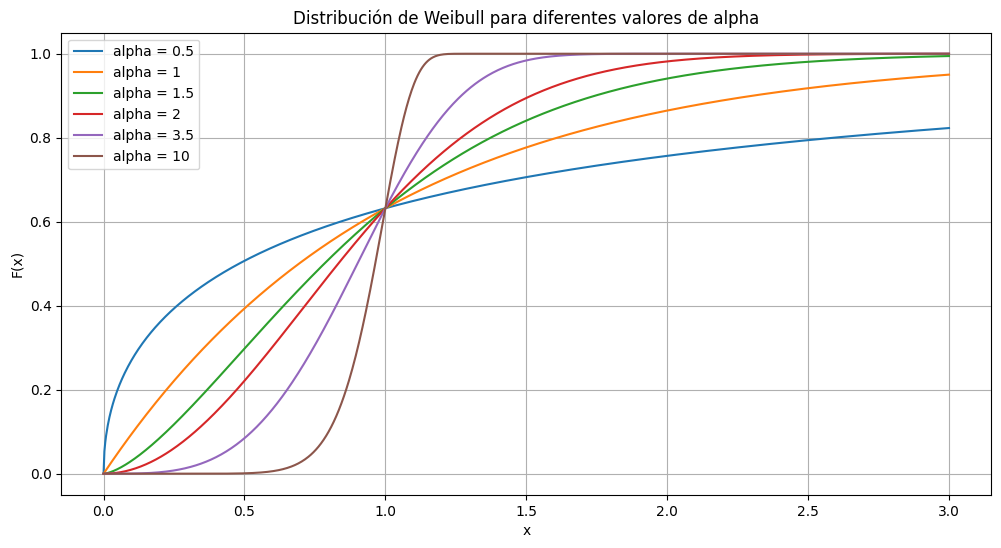

In [ ]:
#WEIBULL


# Valores del parámetro de forma alpha
alphas_w = [0.5, 1, 1.5, 2, 3.5, 10]

# Parámetro de escala lambda
lambda_w = 1

# Crear un rango de valores de x
x_w = np.linspace(0, 3, 1000)

# Gráfico de la distribución de Weibull
plt.figure(figsize=(12, 6))
for alpha in alphas_w:
    y = stat.weibull_min.cdf(x_w, alpha, scale=lambda_w)
    plt.plot(x_w, y, label=f'alpha = {alpha}')
plt.title('Distribución de Weibull para diferentes valores de alpha')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.legend()
plt.grid(True)
plt.show()



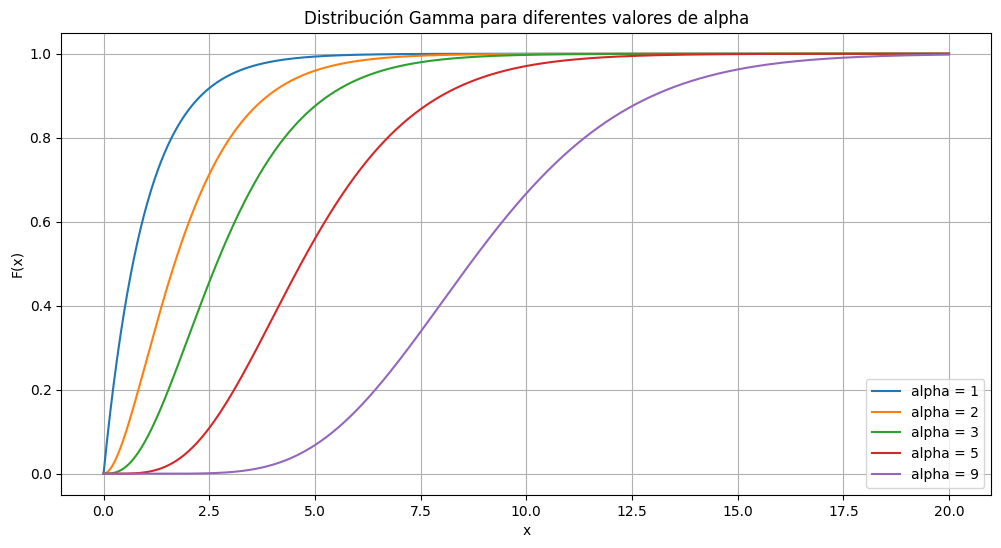

In [ ]:
#GAMMA


# Valores del parámetro de forma alpha
alphas_g = [1, 2, 3, 5, 9]

# Parámetro de escala lambda
lambda_g = 1

# Crear un rango de valores de x
x_g = np.linspace(0, 20, 1000)
# Gráfico de la distribución Gamma
plt.figure(figsize=(12, 6))
for alpha in alphas_g:
    y = stat.gamma.cdf(x_g, alpha, scale= lambda_g)
    plt.plot(x_g, y, label=f'alpha = {alpha}')
plt.title('Distribución Gamma para diferentes valores de alpha')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.legend()
plt.grid(True)
plt.show()

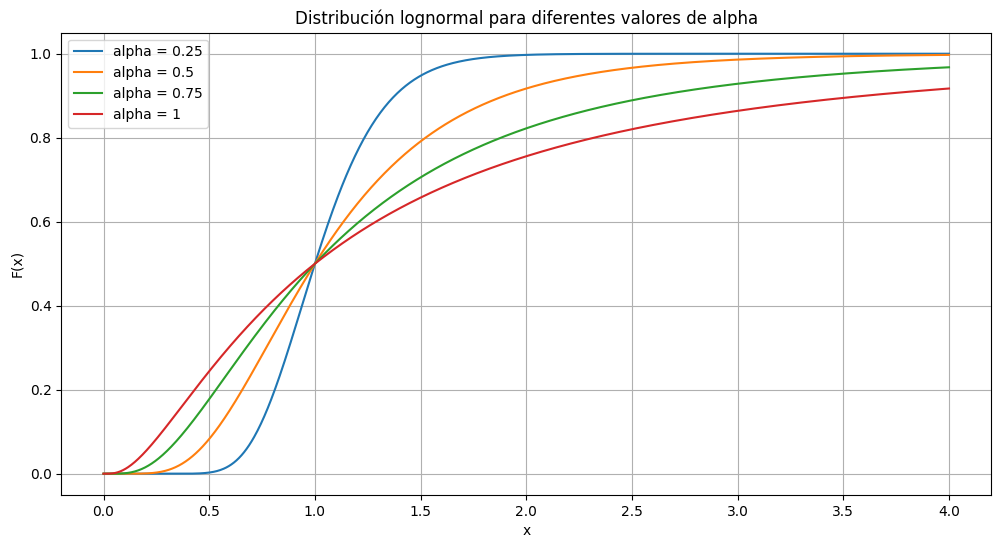

In [ ]:
#lognormal


# Valores del parámetro de forma alpha
alphas_l = [0.25, 0.5, 0.75, 1]

# Parámetro de escala lambda
lambda_l = 1

# Crear un rango de valores de x
x_l= np.linspace(0, 4, 1000)
# Gráfico de la distribución lognormal
plt.figure(figsize=(12, 6))
for alpha in alphas_l:
    y = stat.lognorm.cdf(x_l, alpha, scale= lambda_l)
    plt.plot(x_l, y, label=f'alpha = {alpha}')
plt.title('Distribución lognormal para diferentes valores de alpha')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.legend()
plt.grid(True)
plt.show()

Funciones de estimación para distribución Weibull

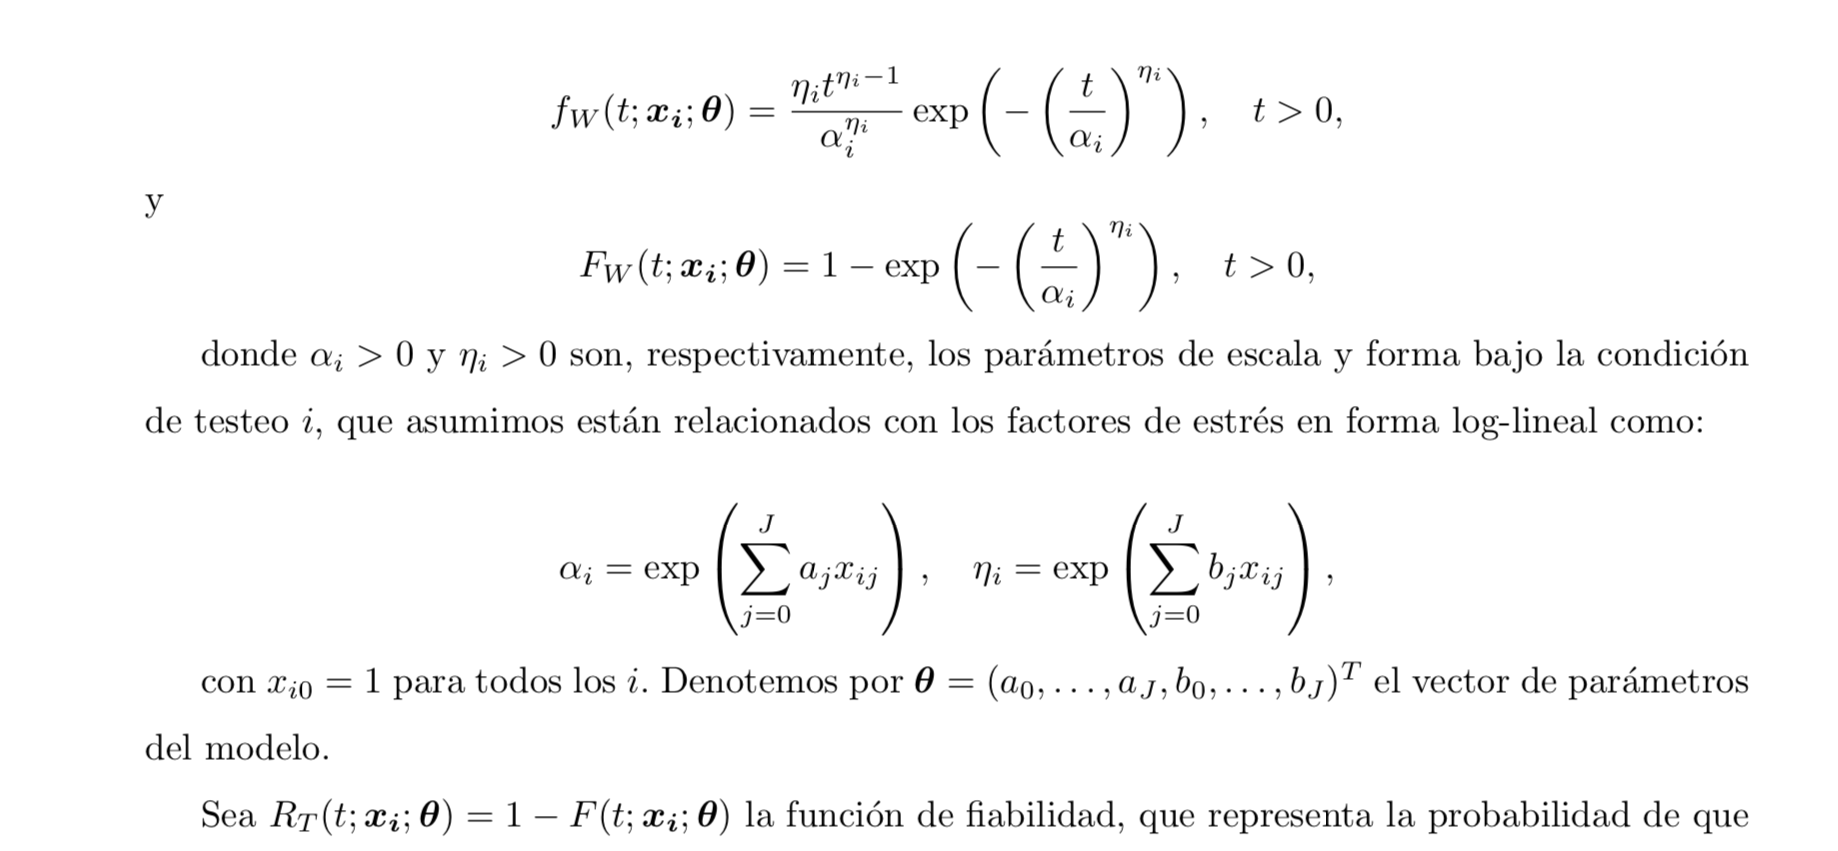

Modelo con tiempo de vida gamma


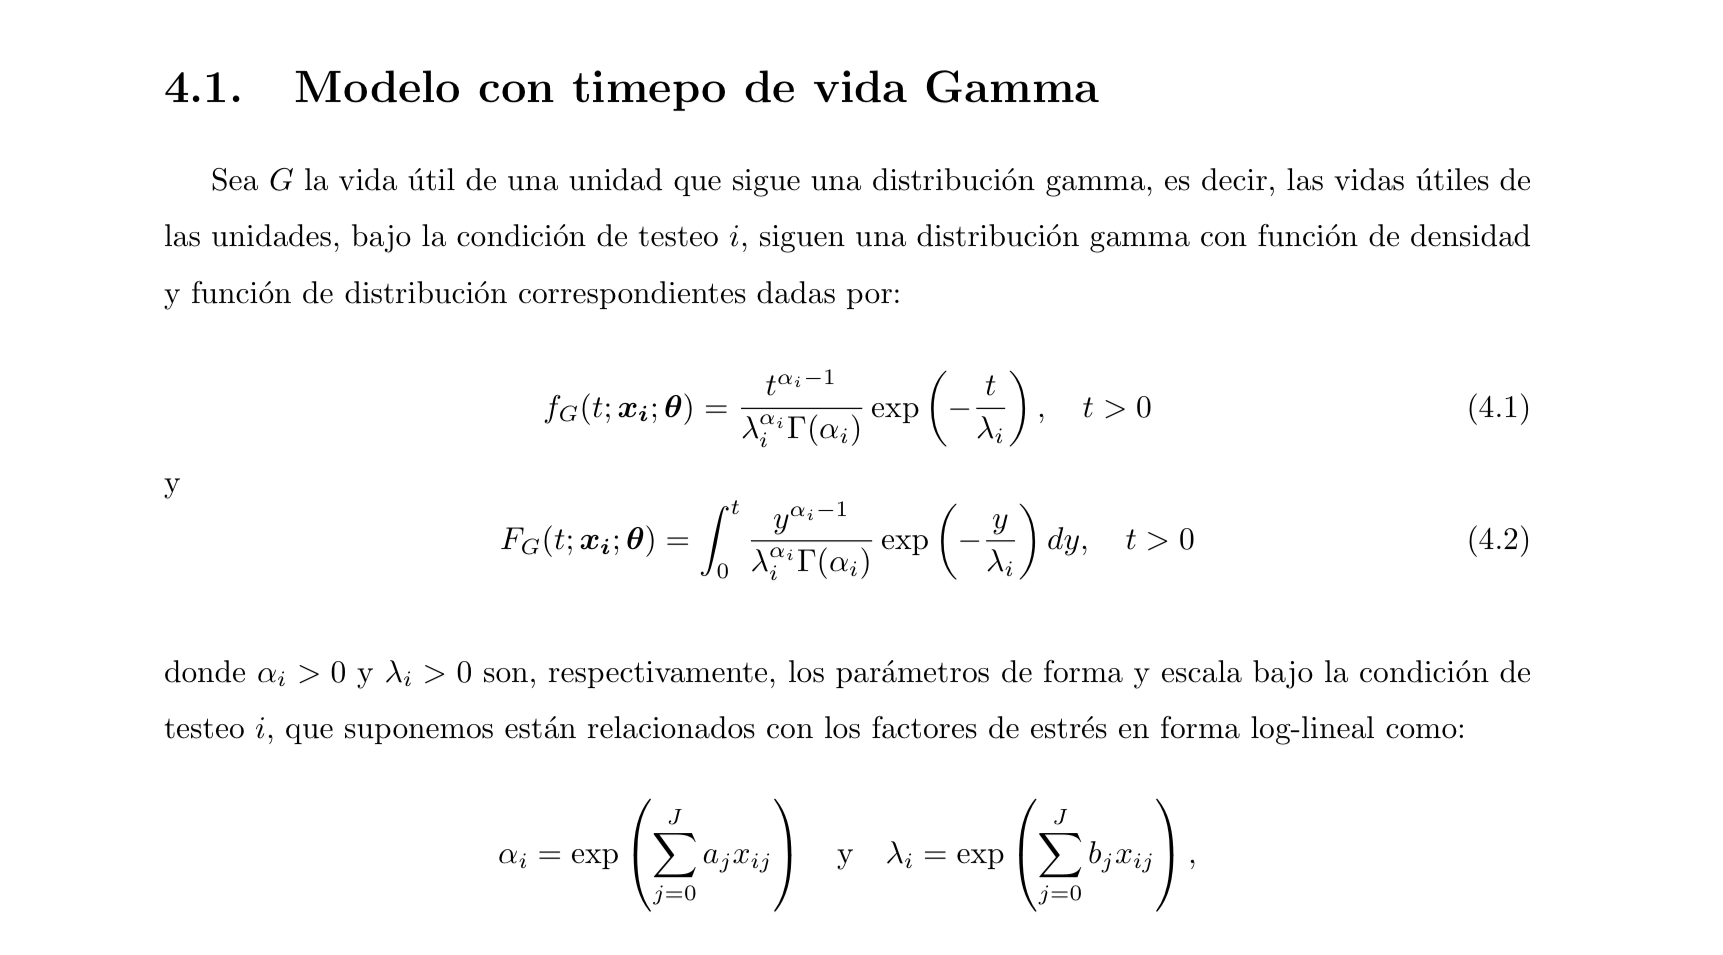

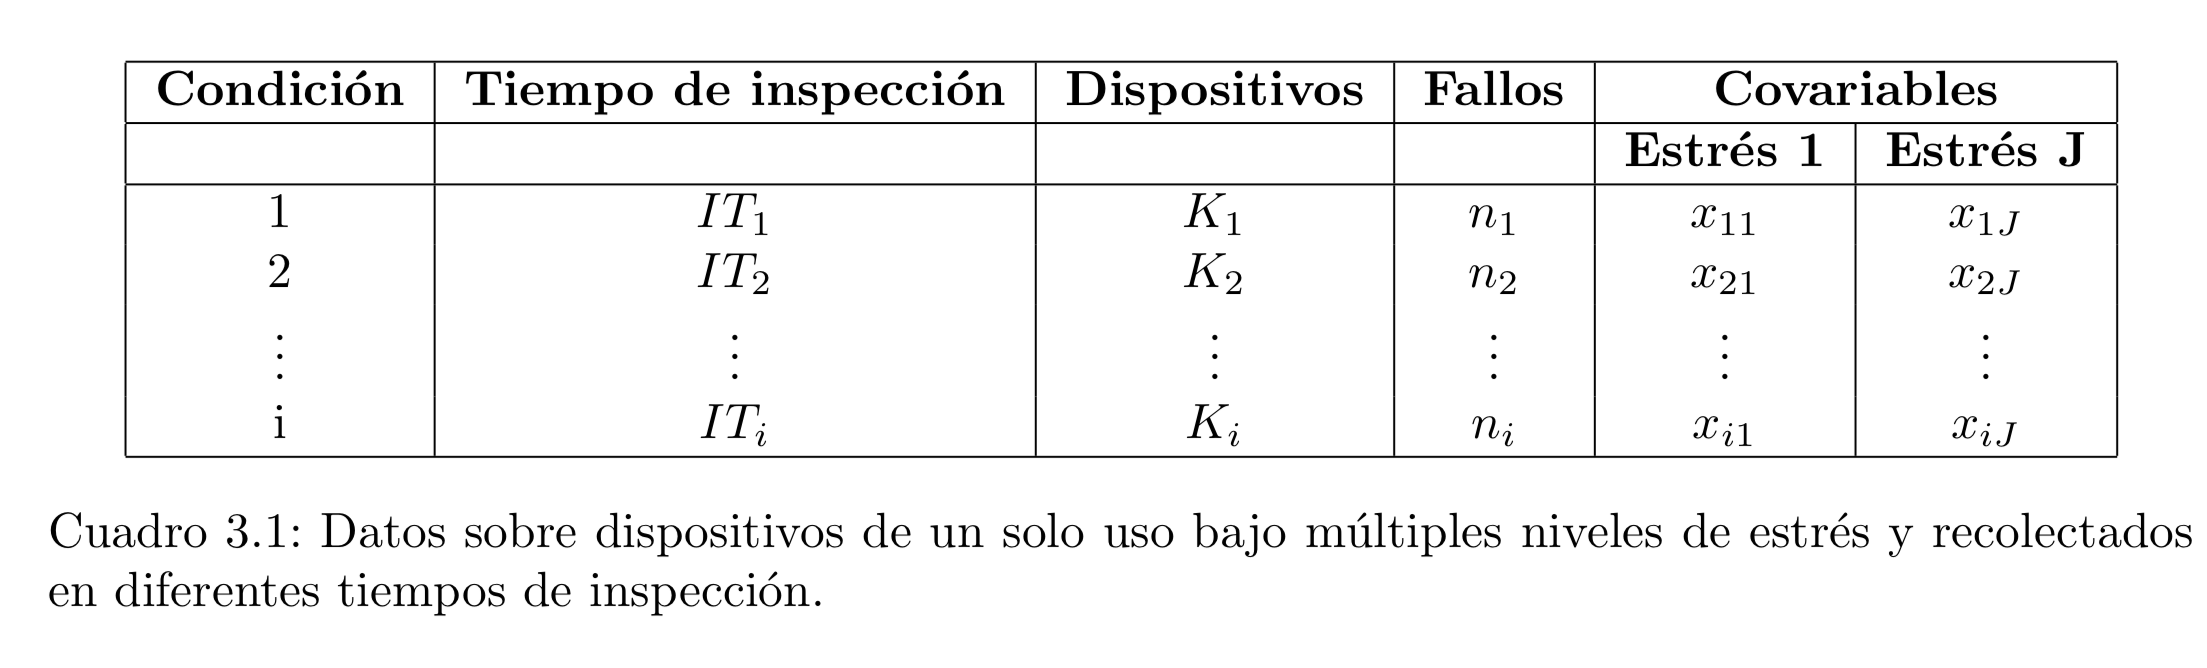

#DATOS PARA CADA DISTRIBUCIÓN

In [85]:
#Datos para la distribución GAMMA

R = 40 #number of simulations
IT = np.array([10,15,20]) #15,20,25,30,35 inspection times #40, 50, 60, 70, 80 #10,20,30,40,50
K = 100
#s1 = 25
#s2 = 30 #np.array([40,50]) #stress levels
s1 = np.array([50,60])
s2 = np.array([0,0])

theta_0 = np.array([4.5, -0.065, -0.36, 0.04])
theta_inicial = np.array([4.3, -0.065 ,-0.36, 0.04])
theta_cont = np.array([4.5, -0.063 ,-0.36, 0.04])


#theta_0 = np.array([5.3, -0.05, -0.06, -0.36, 0.04, -0.01])
#theta_inicial = np.array([5.3, -0.045, -0.06,-0.36, 0.038, -0.01])
#theta_cont = np.array([5.3, -0.045, -0.06,-0.36, 0.04, -0.01])



alphas = np.array([0, 0.2, 0.4, 0.6, 0.8, 1])


In [3]:
#Datos para la distribución Weibull

R = 10 #number of simulations
IT = np.array([8,16,24])
s1 = np.array([30,40,50])
s2 = np.array([0,0,0])

theta_0 = np.array([5.3,-0.05,-0.6,-0.03])
theta_inicial = np.array([5,-0.05,-0.6,-0.03])
theta_cont = np.array([5.3,-0.025,-0.6,-0.03])



alphas = np.array([0, 0.2, 0.4, 0.6, 0.8, 1])

In [4]:
#Datos para la distribución lognormal

R = 10 #number of simulations
IT = np.array([8,16,24,36])
s1 = np.array([30,40,50])
s2 = np.array([0,0,0])

#theta_0 = np.array([5.3,-0.05,-0.6,-0.03])


theta_0 = np.array([6,-0.1,-0.6,0.02])
theta_inicial = np.array([6,-0.1,-0.6,0.02])
theta_cont = np.array([6,-0.1,0,0.02])



alphas = np.array([0, 0.2, 0.4, 0.6, 0.8, 1])

#DEFINICIÓN DE PARÁMETROS Y COMPROBACIÓN GRÁFICA

In [12]:
#GAMMA
#definimos el parámetro de forma

def alpha_i(theta, si1,si2):
  a0 = theta[0]
  a1 = theta[1]
  a2 = theta[2]

  return np.exp(a0 + a1*si1 + a2*si2)

In [6]:
#definimos el parámetro de escala

def lambda_i(theta, si1, si2):
  b0 = theta[3]
  b1 = theta[4]
  b2 = theta[5]

  return np.exp(b0 + b1*si1 + b2*si2)

In [13]:
#Alternativa para GAMMA
#definimos el parámetro de forma

def alpha_i(theta, si1, si2):

  a0 = theta[0]
  a1 = theta[1]
  alphai =[]

  for i in si1:
    alphai.append( np.exp(a0 + a1*i))

  return np.array(alphai)


In [8]:
#definimos el parámetro de escala

def lambda_i(theta, si1, si2):
  b0 = theta[2]
  b1 = theta[3]
  lambdai = []

  for i in si1:

    lambdai.append(np.exp(b0 + b1*i))
  return np.array(lambdai)


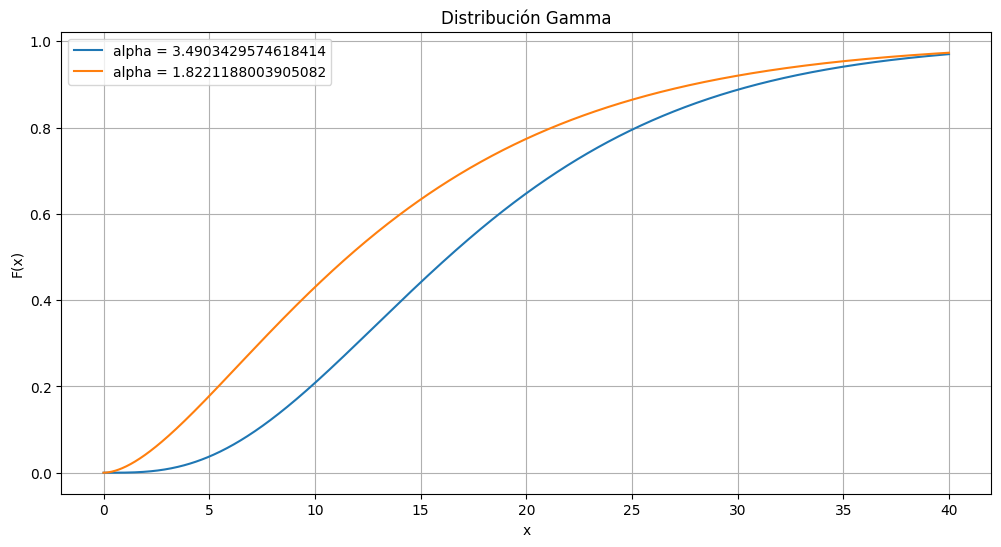

In [14]:
# Valores del parámetro de forma
alpha_g = alpha_i(theta_0, s1, s2)

# Parámetro de escala
lambda_g = lambda_i(theta_0, s1, s2)

# Crear un rango de valores de x
x_g = np.linspace(0, 40, 1000)
# Gráfico de la distribución Gamma
plt.figure(figsize=(12, 6))

for i in zip(alpha_g, lambda_g):
  y = stat.gamma.cdf(x_g, i[0], scale= i[1])
  plt.plot(x_g, y, label=f'alpha = {i[0]}')
plt.title('Distribución Gamma')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.legend()
plt.grid(True)
plt.show()

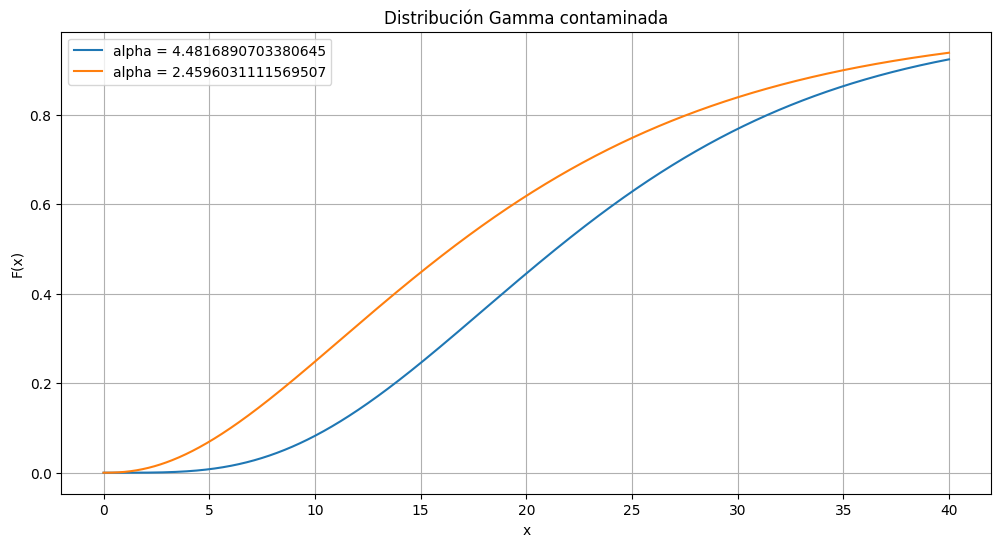

In [15]:
# Valores del parámetro de forma
alpha_g = alpha_i(theta_cont, s1, s2)

# Parámetro de escala
lambda_g = lambda_i(theta_cont, s1, s2)

# Crear un rango de valores de x
x_g = np.linspace(0, 40, 1000)
# Gráfico de la distribución Gamma
plt.figure(figsize=(12, 6))
for i in zip(alpha_g, lambda_g):
  y = stat.gamma.cdf(x_g, i[0], scale= i[1])
  plt.plot(x_g, y, label=f'alpha = {i[0]}')
plt.title('Distribución Gamma contaminada')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#Weibull
#definimos el parámetro de escala

def alpha_i(theta, si1, si2):

  a0 = theta[0]
  a1 = theta[1]
  alpha =[]

  for i in si1:
    alpha.append( np.exp(a0 + a1*i))

  return np.array(alpha)



In [ ]:
#definimos el parámetro de forma

def nu_i(theta, si1, si2):
  b0 = theta[2]
  b1 = theta[3]
  nu = []

  for i in si1:

    nu.append(np.exp(b0 + b1*i))
  return np.array(nu)


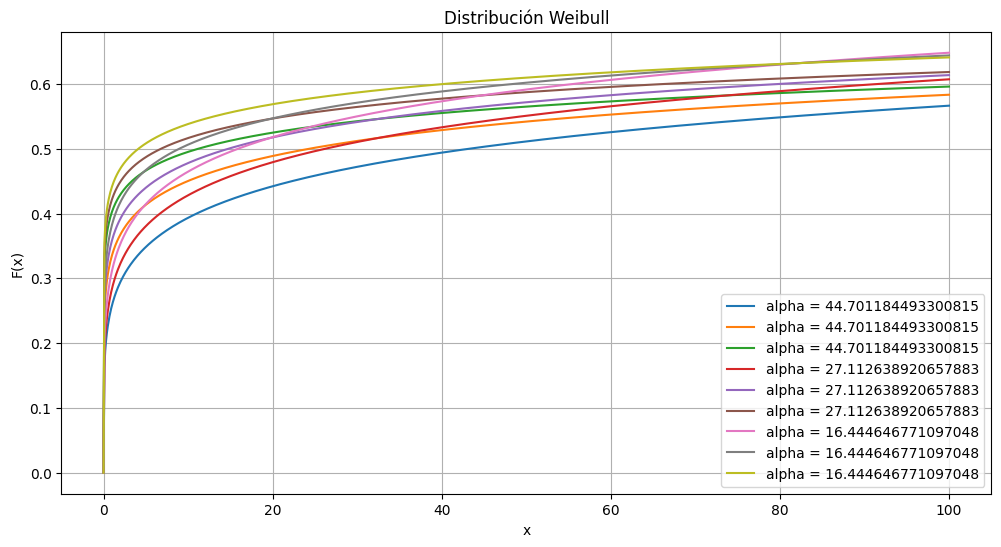

In [ ]:
# Valores del parámetro de forma

nu_w = nu_i(theta_0, s1,s2)
# Parámetro de escala
alpha_w = alpha_i(theta_0, s1,s2)

# Crear un rango de valores de x
x_g = np.linspace(0, 100, 1000)
# Gráfico de la distribución Gamma
plt.figure(figsize=(12, 6))
for alpha in alpha_w:
  for nu in nu_w:
    y = stat.weibull_min.cdf(x_w, nu, scale= alpha)
    plt.plot(x_g, y, label=f'alpha = {alpha}')
plt.title('Distribución Weibull')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.legend()
plt.grid(True)
plt.show()

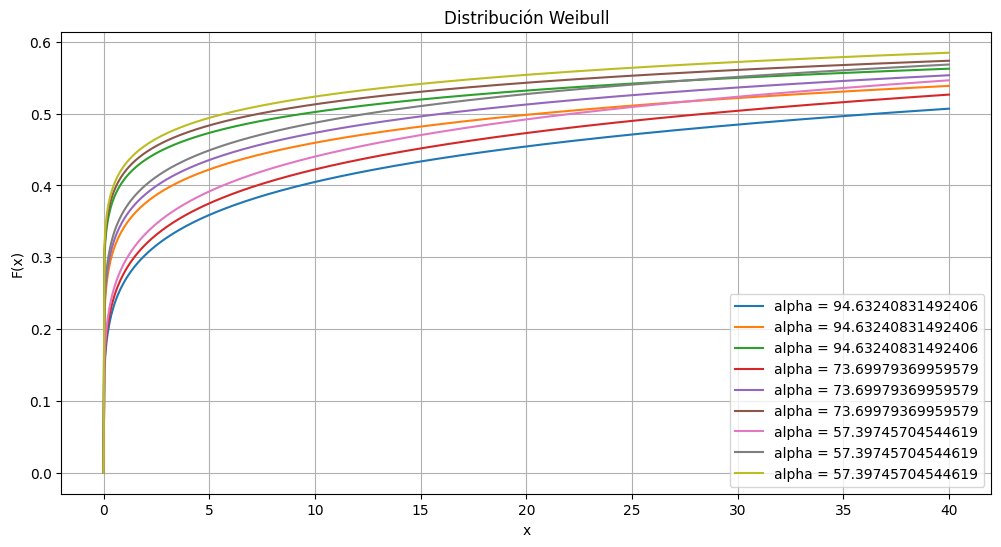

In [ ]:
# Valores del parámetro de forma

nu_w = nu_i(theta_cont, s1,s2)
# Parámetro de escala
alpha_w = alpha_i(theta_cont, s1,s2)

# Crear un rango de valores de x
x_g = np.linspace(0, 40, 1000)
# Gráfico de la distribución Gamma
plt.figure(figsize=(12, 6))
for alpha in alpha_w:
  for nu in nu_w:
    y = stat.weibull_min.cdf(x_w, nu, scale= alpha)
    plt.plot(x_g, y, label=f'alpha = {alpha}')
plt.title('Distribución Weibull')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#lognormal
#definimos el parámetro de escala

def lambda_i(theta, si1, si2):

  a0 = theta[0]
  a1 = theta[1]
  alpha =[]

  for i in si1:
    alpha.append( np.exp(a0 + a1*i))

  return np.array(alpha)



In [ ]:
#definimos el parámetro de forma

def sigma_i(theta, si1, si2):
  b0 = theta[2]
  b1 = theta[3]
  sigma = []

  for i in si1:

    sigma.append(np.exp(b0 + b1*i))
  return np.array(sigma)


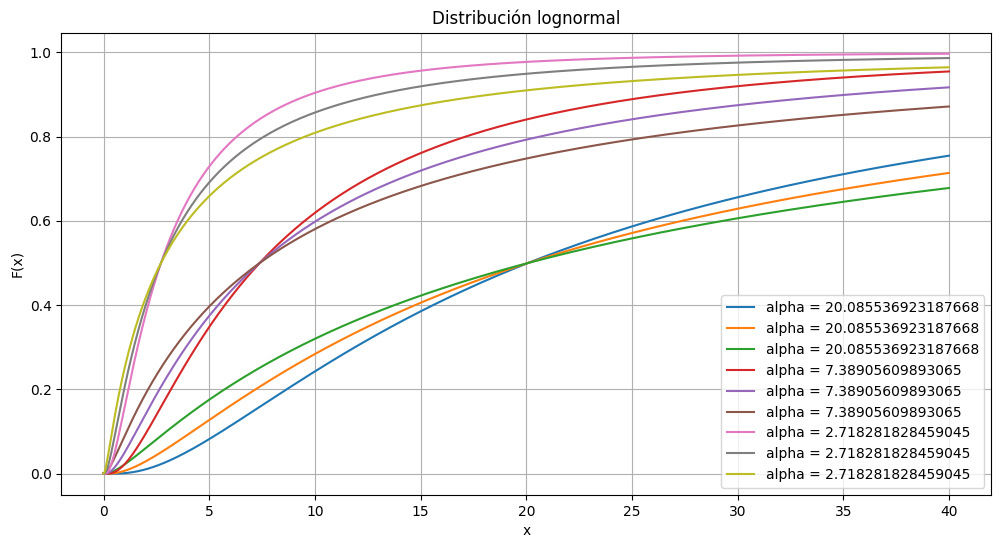

In [ ]:
# Valores del parámetro de forma
lambda_l = lambda_i(theta_0, s1,s2)

# Parámetro de escala
sigma_l = sigma_i(theta_0, s1,s2)

# Crear un rango de valores de x
x_l = np.linspace(0, 40, 1000)
# Gráfico de la distribución Gamma
plt.figure(figsize=(12, 6))
for alpha in lambda_l:
  for sigma in sigma_l:
    y = stat.lognorm.cdf(x_l, sigma, scale= alpha)
    plt.plot(x_l, y, label=f'alpha = {alpha}')
plt.title('Distribución lognormal')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.legend()
plt.grid(True)
plt.show()

In [17]:
# Valores del parámetro de forma alpha
alpha_l = alpha_i(theta_cont, s1,s2)

# Parámetro de escala lambda
sigma_l = sigma_i(theta_cont, s1,s2)

# Crear un rango de valores de x
x_g = np.linspace(0, 40, 1000)
# Gráfico de la distribución Gamma
plt.figure(figsize=(12, 6))
for alpha in alpha_l:
  for sigma in sigma_l:
    y = stat.lognorm.cdf(x_w, sigma, scale= alpha)
    plt.plot(x_g, y, label=f'alpha = {alpha}')
plt.title('Distribución lognormal contaminada')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.legend()
plt.grid(True)
plt.show()

NameError: name 'sigma_i' is not defined

In [18]:
print(alpha_i(theta_0, s1, s2))
print(lambda_i(theta_0, s1, s2))

[3.49034296 1.8221188 ]
[5.15516951 7.6906092 ]


#ESTIMACIÓN

In [25]:

#Generamos la función de distribución (únicamente para Gamma)
def distribucion(t, theta, si1, si2): #Función de distribución

  alphai =alpha_i(theta, s1, s2)
  lambdai =lambda_i(theta, s1, s2)

  return stat.gamma.cdf(t, alphai, scale = lambdai)

In [20]:
print(stat.gamma.cdf(8, 3.4903, scale = 5.1552))

0.1260136678022957


In [21]:
print(stat.gamma.cdf(8, 1.8221, scale = 7.6906))

0.3323563270928492


In [22]:
print(distribucion(8, theta_0, s1, s2))

[0.12600982 0.33234988]


In [ ]:
#Generamos la función de distribución (únicamente para Weibull)

def distribucion(t, theta, si1, si2): #Función de distribución

  alphai =alpha_i(theta, si1, si2)
  nui =nu_i(theta, si1, si2)

  return stat.weibull_min.cdf(t, nui, scale = alphai)


In [ ]:
#Generamos la función de distribución (únicamente para lognormal)

def distribucion(t, theta, si1, si2): #Función de distribución

  sigmai =sigma_i(theta, si1, si2)
  lambdai =lambda_i(theta, si1, si2)

  return stat.lognorm.cdf(t, sigmai, scale = lambdai)


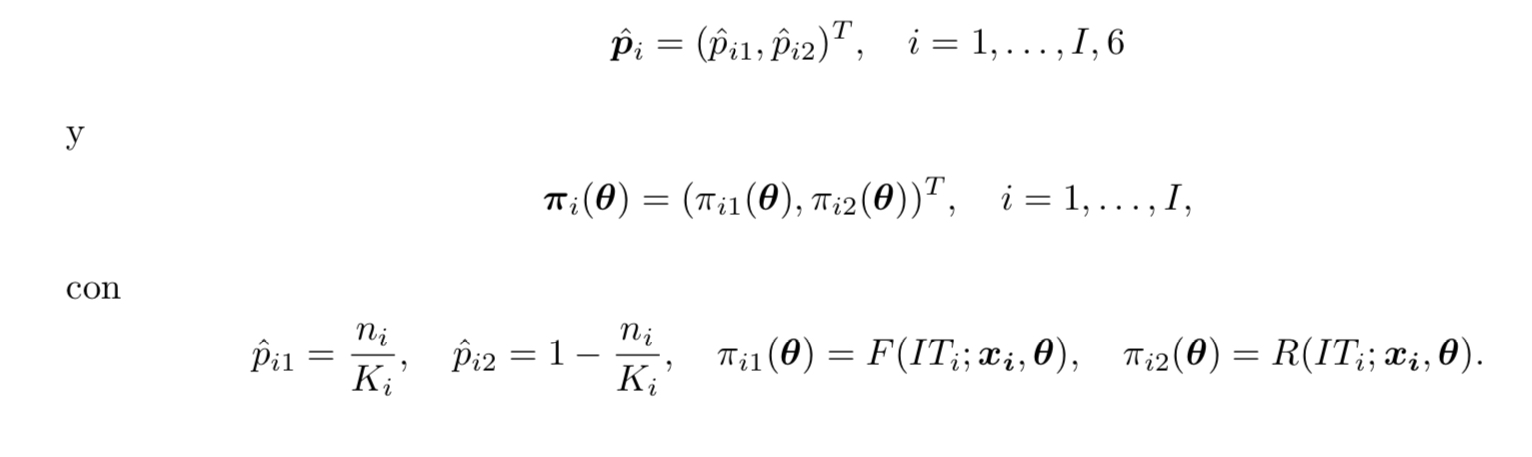


In [26]:
#cálculo de las probabilidades de fallar en cada uno de los intervalos de inspección

def probabilidad_sin_contaminar(theta, IT, s1, s2): #Probabilidad de fallo para cada intervalo

  probabilidades1 = []

  for l in range(len(IT)):
    probabilidades1.extend(distribucion(IT[l], theta, s1 , s2))

  return np.array(probabilidades1)


In [77]:
np.set_printoptions(formatter={'float': '{:0.4f}'.format})  # Set 4 decimal places
print(probabilidad_sin_contaminar(theta_0, IT, s1, s2)[0])
print(probabilidad_sin_contaminar(theta_cont, IT, s1, s2)[0])


0.12600981603633885
0.08491050956346345


In [32]:
#generación de la muestra en base a theta_0 sin contaminar para cada intervalo generado en la anterior caja

def gen_muestra_binomial(theta_0, IT, s1, s2, K, seed):

  n_i =  []
  pi_theta1 = probabilidad_sin_contaminar(theta_0, IT, s1, s2)
  np.random.seed(seed)


  for i in range(len(pi_theta1)):
        n_i.append(np.random.binomial(K, pi_theta1[i]))

  return np.array(n_i)


In [33]:
#Cálculo de los p_i

def probabilidad_estimada(muestra):

  p1 = []
  p2 = []
  p = []

  for i in range(len(muestra)):
    p1.append(muestra[i]/K)
    p2.append(1 - muestra[i]/K)
    #p.append = [p1[i],p2[i]]

  return np.array(p1)

In [51]:
muestra = gen_muestra_binomial(theta_0, IT, s1, s2, K, 10)
print(probabilidad_estimada(muestra))

[0.1500 0.2900 0.5200 0.6200 0.8300 0.8300]


In [54]:
K

100

In [52]:
len(muestra)

6

In [82]:
#Divergencia de Kullback-Leibler
def divergencia_KL(theta, IT, s1, s2, muestra):
  pi_theta1 = probabilidad_sin_contaminar(theta, IT, s1, s2) #tres duplas
  pi_theta2 = 1 - pi_theta1 #tres duplas
  p1 = probabilidad_estimada(muestra)
  p2 = 1 - p1

  K_total = len(muestra)*K
  div_KL = []

  eps = 1e-5


  for i in range(len(muestra)):
    if np.any(np.isclose([pi_theta1[i], pi_theta2[i], p1[i], p2[i]], 0, atol=eps)):
      div_KL.append(K*(((pi_theta1[i])* np.log((p1[i]+eps)/(pi_theta1[i]+eps))) + (pi_theta2[i]* np.log((p2[i]+eps)/(pi_theta2[i]+eps)))))
    else:
      div_KL.append(K*((pi_theta1[i]* np.log(p1[i]/pi_theta1[i])) + (pi_theta2[i]* np.log(p2[i]/pi_theta2[i]))))

  div_KL_pond = (np.sum(div_KL))/K_total

  return div_KL_pond


DPD

In [81]:
#Divergencia de densidad de potencia

def divergencia(theta, alpha, IT, s1, s2, K, muestra):

  pi_theta1 = probabilidad_sin_contaminar(theta, IT, s1, s2)
  pi_theta2 = 1 - pi_theta1
  p1 = probabilidad_estimada(muestra)
  p2 = 1 - p1

  K_total = len(muestra)*K
  div_alpha = []

  if alpha == 0:
    for i in range(len(muestra)) :
      div = divergencia_KL(theta, IT, s1, s2, muestra)
      div_alpha.append(div)

  else:
    for i in range(len(muestra)) :
      div_alpha.append(K*((pi_theta1[i]**(1+ alpha) + pi_theta2[i]**(1+ alpha)) - (1 + 1/alpha)*((p1[i])*(pi_theta1[i])**alpha + (p2[i])*(pi_theta2[i])**alpha)))

  div_alpha_pond = (np.sum(div_alpha))/K_total

  return div_alpha_pond


In [73]:
#EMDP

def emdp(theta_inicial, alpha, IT, s1, s2, K, muestra):

  args = (alpha, IT, s1,s2, K,  muestra)
  #bounds = [(1e-3, None),(None, 1e-3), (None, 1e-3),(1e-3,None)] bounds = bounds

  estimador = opt.minimize(divergencia, theta_inicial, args=args, method = 'BFGS') #Nelder-Mead #L-BFGS-B

  return estimador.x


In [63]:
#RMSE

def rmse(theta_0, estimador):

  error = np.sqrt(np.mean((theta_0 - estimador)**2))

  return error

In [74]:
#RMSE vs RMSE_EMV

def rmse_emv(theta_0, estimador):

  error_emv = (rmse(theta_0, estimador)/np.sqrt(np.mean((theta_0 - estimador[0])**2))) -1

  return error_emv

# CÓDIGO PARA LA SIMULACIÓN

In [83]:
#SIMULACIÓN CONTAMINACIÓN

def simulacion(R, theta_0, theta_inicial, IT,s1,s2, K, alphas):

    media_estimador =[]
    media_estimador_cont = []
    rmse_values = []
    rmse_cont_values = []

    for alpha in alphas:
      estimador = []
      estimador_cont = []
      for j in range(R):
        muestra = gen_muestra_binomial(theta_0, IT, s1, s2, K, j)
        muestra_cont = gen_muestra_binomial(theta_cont, IT, s1, s2, K, j)

        theta_estimador = emdp(theta_inicial, alpha, IT, s1, s2, K, muestra)
        theta_estimador_cont = emdp(theta_inicial, alpha, IT, s1, s2, K, muestra_cont)

        estimador.append(theta_estimador)
        estimador_cont.append(theta_estimador_cont)

      mean_estimator = np.mean(estimador, axis = 0)
      mean_estimator_cont = np.mean(estimador_cont, axis = 0)

      media_estimador.append(mean_estimator)
      media_estimador_cont.append(mean_estimator_cont)


      mse = np.mean((theta_0 - mean_estimator) ** 2)
      rmse = np.sqrt(mse)
      rmse_values.append(rmse)

      mse_cont = np.mean((theta_0 - mean_estimator_cont) ** 2)
      rmse_cont = np.sqrt(mse_cont)
      rmse_cont_values.append(rmse_cont)

    # Convert results to DataFrames
    df_estimators = pd.DataFrame(media_estimador, columns=[f"param_{i+1}" for i in range(len(theta_0))])
    df_estimators["alpha"] = alphas
    df_estimators_cont = pd.DataFrame(media_estimador_cont, columns=[f"param_cont_{i+1}" for i in range(len(theta_0))])
    df_estimators_cont["alpha"] = alphas

    df_rmse = pd.DataFrame({"alpha": alphas, "rmse": rmse_values, "rmse_cont": rmse_cont_values})

    # Save to CSV
    df_estimators.to_csv("estimators.csv", index=False)
    df_estimators_cont.to_csv("estimators_cont.csv", index=False)
    df_rmse.to_csv("rmse.csv", index=False)

    print("CSV files saved: 'estimators.csv', 'estimators_cont.csv', and 'rmse.csv'")

    return np.array(media_estimador), np.array(media_estimador_cont), np.array(rmse_values), np.array(rmse_cont_values)




In [86]:
#RESULTADOS
print(simulacion(R, theta_0, theta_inicial, IT,s1,s2, K, alphas))

<ipython-input-82-a13e5f5111bf>:15: RuntimeWarning: divide by zero encountered in scalar divide
  div_KL.append(K*((pi_theta1[i]* np.log(p1[i]/pi_theta1[i])) + (pi_theta2[i]* np.log(p2[i]/pi_theta2[i]))))
<ipython-input-82-a13e5f5111bf>:15: RuntimeWarning: invalid value encountered in scalar multiply
  div_KL.append(K*((pi_theta1[i]* np.log(p1[i]/pi_theta1[i])) + (pi_theta2[i]* np.log(p2[i]/pi_theta2[i]))))
<ipython-input-82-a13e5f5111bf>:15: RuntimeWarning: divide by zero encountered in scalar divide
  div_KL.append(K*((pi_theta1[i]* np.log(p1[i]/pi_theta1[i])) + (pi_theta2[i]* np.log(p2[i]/pi_theta2[i]))))
<ipython-input-82-a13e5f5111bf>:15: RuntimeWarning: invalid value encountered in scalar multiply
  div_KL.append(K*((pi_theta1[i]* np.log(p1[i]/pi_theta1[i])) + (pi_theta2[i]* np.log(p2[i]/pi_theta2[i]))))
/usr/local/lib/python3.11/dist-packages/scipy/stats/_distn_infrastructure.py:2071: RuntimeWarning: divide by zero encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dt

CSV files saved: 'estimators.csv', 'estimators_cont.csv', and 'rmse.csv'
(array([[1.2226, -164.3674, -3.2607, -155.2065],
       [4.2440, -0.0605, -0.1535, 0.0367],
       [4.2354, -0.0603, -0.1439, 0.0365],
       [4.2287, -0.0602, -0.1363, 0.0364],
       [4.2238, -0.0601, -0.1308, 0.0363],
       [4.2204, -0.0601, -0.1268, 0.0362]]), array([[-0.5268, -257.8032, -4.9150, -243.9037],
       [4.9694, -0.0726, -0.9384, 0.0519],
       [4.9564, -0.0724, -0.9233, 0.0517],
       [4.9470, -0.0722, -0.9121, 0.0515],
       [4.9411, -0.0721, -0.9049, 0.0514],
       [4.9380, -0.0721, -0.9008, 0.0513]]), array([113.0441, 0.1645, 0.1708, 0.1758, 0.1795, 0.1821]), array([177.4708, 0.3725, 0.3626, 0.3552, 0.3506, 0.3480]))


In [ ]:
import numpy as np

def simulacion1(R, theta_0, theta_inicial, IT, s1, s2, K, alphas):
    media_div_alpha = []  # Stores mean divergences for each alpha

    for alpha in alphas:
        div_alpha = []  # Stores divergence values for each simulation (R)

        for j in range(R):
            muestra = gen_muestra_binomial(theta_0, IT, s1, s2, K, j)

            div = divergencia(theta_inicial, alpha, IT, s1, s2, K, muestra)  # Compute divergence

            div_alpha.append(div)  # Store divergence value for this run

        # Compute mean divergence for current alpha
        mean_div = np.mean(div_alpha)
        media_div_alpha.append(mean_div)  # Store mean divergence for each alpha

    # Convert results to a NumPy array
    return np.array(media_div_alpha)





In [ ]:
print(simulacion1(R, theta_0, theta_inicial, IT,s1,s2, K, alphas))

[-6.85055341e-04 -8.93269829e+00 -4.01792874e+00 -2.42482010e+00
 -1.65537188e+00 -1.21121271e+00]


Cálculo de la fiabilidad

In [ ]:
IT1 = np.array([12,20,28])
#theta_0 = np.array([4.5, -0.065, -0.36, 0.04])

s_prueba = 50

In [ ]:
#Generamos la función de distribución (únicamente para Gamma)

def distribucion1(t, theta,s): #Función de distribución

  a0 = theta[0]
  a1 = theta[1]
  b0 = theta[2]
  b1 = theta[3]


  alphai =np.exp(a0 + a1*s_prueba)
  lambdai =np.exp(b0 + b1*s_prueba)

  return stat.gamma.cdf(t, alphai, scale = lambdai)

In [ ]:

def fiabilidad(theta, IT, s): #Probabilidad de fallo para cada intervalo


  probabilidades1 = []
  probabilidades2 = []

  for l in range(len(IT)):

    probabilidades1.append(distribucion1(IT[l], theta, s))
    probabilidades2.append(1 - distribucion1(IT[l], theta, s))


  return np.array(probabilidades2)


In [ ]:
df = pd.read_csv("/content/estimators.csv")  # Replace with the actual CSV file path
results_list = []

for index, row in df.iterrows():
    theta = row[0:6].values  # Extract the 6 estimated parameters from each row
    alpha_value = row.iloc[-1]  # Extract alpha value

    prob_vector = fiabilidad(theta, IT1, s_prueba)  # Compute fiabilidad function

    # Store results in a dictionary format
    results_list.append([alpha_value] + prob_vector.tolist())

columns = ["alpha"] + [f"R{IT1[i]}" for i in range(len(IT1))]
results_df = pd.DataFrame(results_list, columns=columns)

# Step 6: Save results to a separate CSV file
results_df.to_csv("fiabilidad_results.csv", index=False)

# Print confirmation
print("Results saved in 'fiabilidad_results.csv'.")

Results saved in 'fiabilidad_results.csv'.


In [ ]:
df = pd.read_csv("/content/estimators_cont.csv")  # Replace with the actual CSV file path
results_list = []

for index, row in df.iterrows():
    theta = row[0:6].values  # Extract the 6 estimated parameters from each row
    alpha_value = row.iloc[-1]  # Extract alpha value

    prob_vector = fiabilidad(theta, IT1, s_prueba)  # Compute fiabilidad function

    # Store results in a dictionary format
    results_list.append([alpha_value] + prob_vector.tolist())

columns = ["alpha"] + [f"R{IT1[i]}" for i in range(len(IT1))]
results_df = pd.DataFrame(results_list, columns=columns)

# Step 6: Save results to a separate CSV file
results_df.to_csv("fiabilidad_results_cont.csv", index=False)

# Print confirmation
print("Results saved in 'fiabilidad_results_cont.csv'.")

Results saved in 'fiabilidad_results_cont.csv'.


In [ ]:
print(fiabilidad(theta_0, IT1, s_prueba))

[0.99670601 0.89026184 0.54423453]


In [ ]:
#Corregir error

# Step 1: Load computed fiabilidad values from CSV
df = pd.read_csv("/content/fiabilidad_results.csv")  # Load previously saved CSV

# Step 2: Define the real fiabilidad vector (fixed reference values)
real_fiabilidad = fiabilidad(theta_0, IT1, s1, s2)  # Example values

# Step 3: Extract only the fiabilidad columns (ignore alpha)
fiabilidad_values = df.iloc[:, 1:].values  # Convert to NumPy array (excluding alpha)

# Step 4: Compute the error by subtracting real fiabilidad
error_values = fiabilidad_values - real_fiabilidad  # Element-wise subtraction

# Step 5: Create a new DataFrame with errors
error_df = pd.DataFrame(error_values, columns=[f"Error_R{col}" for col in df.columns[1:]])
error_df.insert(0, "alpha", df["alpha"])  # Reinsert alpha column

# Step 6: Save the error data to a new CSV file
error_df.to_csv("fiabilidad_errors.csv", index=False)

# Print confirmation
print("Error values saved in 'fiabilidad_errors.csv'.")

ValueError: operands could not be broadcast together with shapes (6,5) (5,2) 

In [ ]:
media_est, media_est_cont, rmse_vals, rmse_cont_vals = simulacion(R, theta_0, theta_inicial, IT,s1,s2, K, alphas)

print("Mean Estimators:\n", media_est)
print("RMSE Values:\n", rmse_vals)

KeyboardInterrupt: 

# CÓDIGO PARA LA SELECCIÓN DEL MODELO

In [ ]:
def u_ij(theta, i, j):
    """
    Function defining u_ij(theta).
    """
    pi_theta = pi_theta = probabilidad_sin_contaminar(theta, tau1, IT)
    return

def J_alpha(theta, K, I, alpha):
    pi_theta = probabilidad_sin_contaminar(theta, tau1, IT)
    J = np.zeros((len(theta), len(theta)))
    for i in range(I):
        for j in range(2):
            u = u_ij(theta, i, j).reshape(-1, 1)
            J += (K[i] / sum(K)) * (u @ u.T * pi_theta[j]**alpha)
    return J

def xi_i_alpha(theta, i, alpha):

    pi_theta = probabilidad_sin_contaminar(theta, tau1, IT)
    """
    Compute ξ_i,β(θ).
    """
    xi = np.zeros(len(theta))
    for j in range(2):
        xi += u_ij(theta, i, j) * pi_theta[j]**(alpha + 1)
    return xi.reshape(-1, 1)

def K_alpha(theta, K, I, alpha):

    pi_theta = probabilidad_sin_contaminar(theta, tau1, IT)

    K_mat = np.zeros((len(theta), len(theta)))
    for i in range(I):
        for j in range(2):
            u = u_ij(theta, i, j).reshape(-1, 1)
            K_mat += (K[i] / sum(K)) * (u @ u.T * pi_theta[j]**(2*alpha + 1))

        xi = xi_i_alpha(theta, i, alpha)
        K_mat -= (K[i] / sum(K)) * (xi @ xi.T)

    return K_mat

# Compute matrices
J = J_alpha(theta, K, I, alpha)
K_mat = K_alpha(theta, K, I, alpha)

# Display results
print("alpha(theta):\n", J)
print("K_alpha(theta):\n", K_mat)


In [ ]:
def DIC_alpha(divergencia, K_alpha, J_alpha, alpha,  IT, muestra):

    trace_term = np.trace(np.linalg.inv(J_alpha) @ K_alpha)
    muestra = muestra = gen_muestra_binomial(theta_0, IT, K, i)
    d_alpha =divergencia(theta, alpha, IT, muestra)

    # Compute DIC^β
    DIC = d_alpha + ((alpha + 1) / alpha) * trace_term

    return DIC

# Example matrices
d_beta_hat = 5.0  # Example d_beta function evaluation
beta = 1  # Example beta value

# Example matrices for demonstration (replace with actual computed matrices)
K_beta_hat = np.array([[2.0, 0.5], [0.5, 1.0]])
J_beta_hat = np.array([[1.5, 0.3], [0.3, 1.2]])

# Compute DIC^alpha
DIC_value = DIC_alpha(divergencia, K_alpha, J_alpha, alpha, tau1, IT, muestra):

# Print result
print("DIC^alpha value:", DIC_value)


PRUEBAS PARA DIC

In [ ]:
import numpy as np
import scipy.stats as stat
import matplotlib.pyplot as plt

# Example: Generate synthetic Weibull-distributed data (if you have real data, use it instead)
np.random.seed(42)  # For reproducibility
shape_true = 2.0  # True shape parameter (k)
scale_true = 5.0  # True scale parameter (lambda)
sample_size = 1000
sample = stat.weibull_min.rvs(shape_true, scale=scale_true, size=sample_size)

# Fit a Weibull distribution to the sample
shape_est, loc, scale_est = stat.weibull_min.fit(sample, floc=0)  # Fix location to 0

# Print estimated parameters
print(f"Estimated Shape (k): {shape_est:.4f}")
print(f"Estimated Scale (λ): {scale_est:.4f}")

# Plot histogram and fitted Weibull PDF
x = np.linspace(0, max(sample), 1000)
pdf_fitted = stat.weibull_min.pdf(x, shape_est, scale=scale_est)

plt.figure(figsize=(10, 5))
plt.hist(sample, bins=30, density=True, alpha=0.6, color='gray', label="Sample Histogram")
plt.plot(x, pdf_fitted, 'r-', label=f'Fitted Weibull (k={shape_est:.2f}, λ={scale_est:.2f})')
plt.xlabel("x")
plt.ylabel("Density")
plt.title("Fitting a Weibull Distribution to Sample Data")
plt.legend()
plt.grid(True)
plt.show()


# CÓDIGO ESTIMACIÓN DATOS REALES


In [ ]:
muestra = []
s1 = []